## Observations and Insights 

In [1]:
# Observations:

# 1)When we look that line plot, there are 2 Drug Regimens(Capomulin,Ramicane) which are used the most treatment regimens though 
# their average are the least amount when we compare with other Drug Regimens.
# 2)The mice which are given Capomulin have the least Tumor Volume during Timepoint range 30-35 and 
# the highest Tumor Volume is at Timepoint 20. 
# 3)After checking their scatter plot chart of mouse weight and average tumor volume for the Capomulin regimen, 
# its linear regression shows us there is a direct relation between Mouse Weight and Average Tumor Volume 
# which means that the more weight the mouse has, the more average tumor volume it has.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results, on='Mouse ID', how="outer")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice=mouse_metadata['Mouse ID'].count() + study_results['Mouse ID'].count()
print(total_mice)


2142


In [4]:
total_sum=combined_data["Mouse ID"].unique()
len(total_sum)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID
study_data_mice= combined_data.set_index('Mouse ID')
all_dup_data=study_data_mice.loc["g989",:]
all_dup_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_study_data=combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"])

clean_study_data=combined_data[combined_data["Mouse ID"]!="g989"]

clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_data=clean_study_data["Mouse ID"].unique()
len(clean_data)

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean=clean_study_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
# mean_reg=pd.Series(regimen_mean.values)

regimen_median=clean_study_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# median_reg=pd.Series(regimen_median.values)

regimen_var=clean_study_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# var_reg=pd.Series(regimen_var.values)

In [10]:
regimen_std=clean_study_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# std_reg=pd.Series(regimen_std.values)


In [11]:
regimen_sem=clean_study_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# sem_reg=pd.Series(regimen_std.values)

In [12]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
frame={"Mean":regimen_mean,"Median":regimen_median,"Variance":regimen_var,"Std Dev":regimen_std,"Sem":regimen_sem}
summary_sta=pd.DataFrame(frame)
# summary_sta.set_index('Drug Regimen')
summary_sta

,Mean,Median,Variance,Std Dev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_study_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

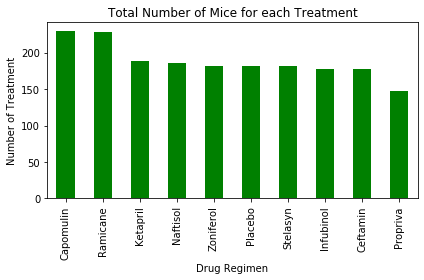

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_chart=clean_study_data["Drug Regimen"].value_counts()
chart1=bar_chart.plot(kind="bar", title='Total Number of Mice for each Treatment',color='green')
chart1.set_xlabel("Drug Regimen")
chart1.set_ylabel("Number of Treatment")
plt.tight_layout()
plt.savefig("Graphs/Bar_Chart1pandasplt.png")
plt.show()


In [15]:
bar_chart.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

In [16]:
bar_chart.index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

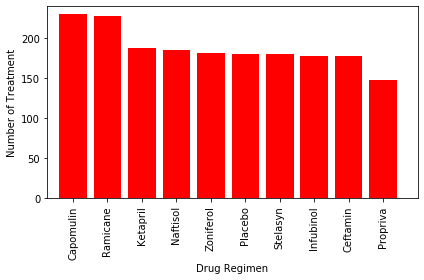

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_values=bar_chart.index
y_values=bar_chart.values
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatment")
plt.title='Total Number of Mice for each Treatment'
plt.bar(x_values,y_values,align="center",color="r")
plt.xlim(-.75,10)
plt.ylim(0,max(y_values)+10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Graphs/Bar_charts_pyplot.png")
plt.show()

In [19]:
pie_chart=clean_study_data['Sex'].value_counts()
pie_chart
num_male=pie_chart.iloc[0]
num_female=pie_chart.iloc[1]

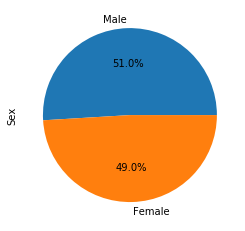

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_male=pie_chart.iloc[0]
num_female=pie_chart.iloc[1]
size=[num_male,num_female]
pie_chart.plot(kind="pie", autopct="%1.1f%%")
plt.savefig("Graphs/Pie_chart_pandas.png")
plt.show()

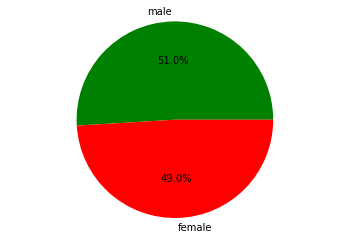

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size=[num_male,num_female]
my_color=["green","red"]
label=["male","female"]
plt.pie(size,colors=my_color,labels=label,autopct="%1.1f%%")
plt.axis("equal")
plt.savefig("Graphs/Pie_chart_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
clean_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Start by getting the last (greatest) timepoint for each mouse
vol_each_mouse=clean_study_data.groupby('Mouse ID')
total_vol=vol_each_mouse["Timepoint"].max()
total_vol

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df=pd.merge(clean_study_data,total_vol,on=["Mouse ID","Timepoint"], how="left")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filter=merge_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])
merge_df[filter]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1855,z581,Infubinol,Female,24,25,25,54.316407,2
1856,z581,Infubinol,Female,24,25,30,56.286750,2
1857,z581,Infubinol,Female,24,25,35,58.628399,3
1858,z581,Infubinol,Female,24,25,40,60.053740,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol_data=[]

for regimen in treatment_list:
        drug_vol=merge_df.loc[merge_df["Drug Regimen"]==regimen]["Tumor Volume (mm3)"]
        tumor_vol_data.append(drug_vol)  
     # Calculate the IQR and quantitatively determine if there are any potential outliers. 
     # Locate the rows which contain mice on each drug and get the tumor volumes
        quartiles=drug_vol.quantile([.25,.50,.75])
        lowerq=round(quartiles[0.25],3)
        upperq=round(quartiles[0.75],3)
        median=round(quartiles[0.5],3)
        iqr=upperq-lowerq
        
     
      # Determine outliers using upper and lower bounds  
        lower_bound=lowerq-(1.5*iqr)
        upper_bound=upperq+(1.5*iqr)
     
        outliers=drug_vol.loc[(drug_vol>upper_bound)| (drug_vol<lower_bound)]
        print(f"\n {regimen}")
        print(f" Number of Observations: {len(drug_vol)}")
        print(f" Quartile Values: {'{:.3f}'.format(upperq)} {'{:.3f}'.format(median)} {'{:.3f}'.format(lowerq)} , IQR: {round(iqr,3)} ")
        print(f" Outlier Boundaries: {'{:.3f}'.format(lower_bound)} and {'{:.3f}'.format(upper_bound)} ")
        if len(outliers)==0:
              print(f" Potential Outliers for {regimen} : None ")
        else:
                print(f" Potential Outliers for {regimen} : {outliers}")
        


 Capomulin
 Number of Observations: 230
 Quartile Values: 45.000 41.558 37.686 , IQR: 7.314 
 Outlier Boundaries: 26.715 and 55.971 
 Potential Outliers for Capomulin : 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

 Ramicane
 Number of Observations: 228
 Quartile Values: 45.000 40.673 36.675 , IQR: 8.325 
 Outlier Boundaries: 24.187 and 57.488 
 Potential Outliers for Ramicane : 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

 Infubinol
 Number of Observations: 178
 Quartile Values: 57.314 51.821 47.312 , IQR: 10.002 
 Outlier Boundaries: 32.309 and 72.317 
 Potential Outliers for Infubinol : None 

 Ceftamin
 Number of Observations: 178
 Quartile Values: 56.801 51.776 47.208 , IQR: 9.593 
 Outlier Boundaries: 32.818 and 71.191 
 Potential Outliers for Ceftamin : None 


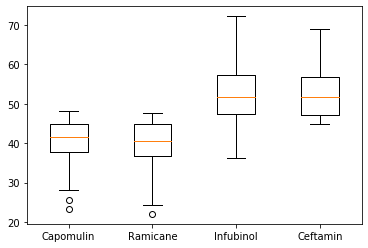

<Figure size 432x288 with 0 Axes>

In [28]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
  # add subset    
plt.boxplot(tumor_vol_data,labels = treatment_list)
plt.show()
plt.tight_layout()
plt.savefig("Graphs/Box_Plot.png")
plt.show()

## Line and Scatter Plots

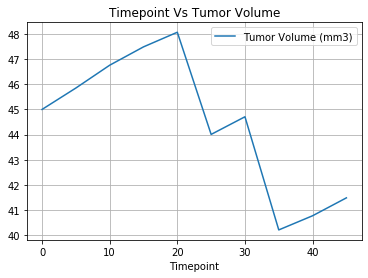

In [29]:
capomulin=clean_study_data.loc[clean_study_data['Drug Regimen']=='Capomulin']
mousedata = capomulin.loc[capomulin['Mouse ID']== 'l509']
mousedata.plot(x="Timepoint",y="Tumor Volume (mm3)",title="Timepoint Vs Tumor Volume")
plt.grid()
plt.savefig("Graphs/Line_plot1.png")
plt.show()

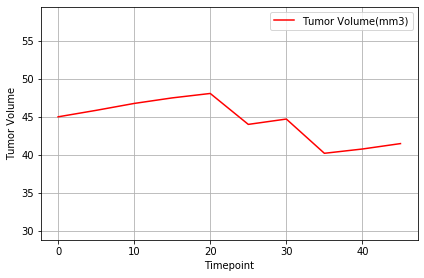

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mousedata = capomulin.loc[capomulin['Mouse ID']== 'l509']
x_axis=mousedata["Timepoint"]
x_axis
y_axis=mousedata["Tumor Volume (mm3)"]
y_axis
plt.plot(x_axis,y_axis,color="red",label="Tumor Volume(mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.legend(loc="best")
plt.ylim(40,49)
plt.xlim(-1,47)
plt.axis("equal")

plt.grid()
plt.tight_layout()
plt.savefig("Graphs/Line_Plot2.png")
plt.show()


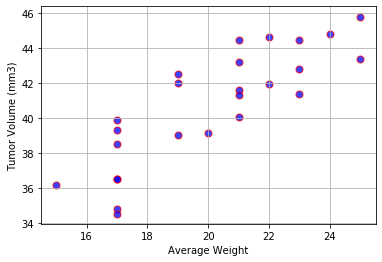

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin=clean_study_data.loc[clean_study_data['Drug Regimen']=='Capomulin']
capomulin_average = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'], marker="o", facecolors="blue",edgecolors="red",alpha=0.75, s=50)
plt.xlabel("Average Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.savefig("Graphs/Scatter_plot_weight_vs_ave_tumorvol.png")
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_average = capomulin.groupby(['Mouse ID']).mean()

x_value_capo=capomulin_average['Weight (g)']

y_value_capo=capomulin_average['Tumor Volume (mm3)']

correlation=st.pearsonr(x_value_capo,y_value_capo)

print(f" The correlation between both factors is {round(correlation[0],2)}")

 The correlation between both factors is 0.84


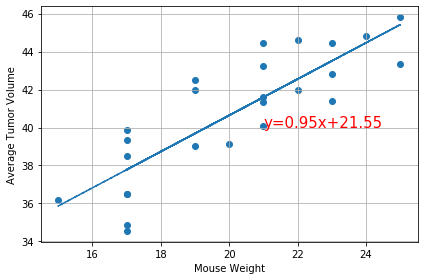

In [33]:
# Calculate linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_average = capomulin.groupby(['Mouse ID']).mean()

x_value_capo=capomulin_average['Weight (g)']

y_value_capo=capomulin_average['Tumor Volume (mm3)']

slope,intercept_capo,rvalue,pvalue,stder=st.linregress(x_value_capo,y_value_capo)

capo_fit=slope*x_value_capo+intercept_capo

line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept_capo,2))

plt.scatter(x_value_capo,y_value_capo)

plt.plot(x_value_capo,capo_fit,"--")

plt.annotate(line_eq,(21,40),fontsize=15, color="red")

plt.xlabel("Mouse Weight")

plt.ylabel("Average Tumor Volume")
plt.grid()

plt.tight_layout()
plt.savefig("Graphs/lin_regression.png")

plt.show()